**Importando as bibliotecas necessárias**

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator

**LENDO ARQUIVO CSV**

In [166]:
df = pd.read_csv('DecisaoImoveisLimpo.csv')

**Bairro com maior número de imóveis**

In [167]:
bairro_maior_num_imoveis = df['Bairro'].value_counts().idxmax()
print(f'O bairro com maior número de imóveis é: {bairro_maior_num_imoveis}')

O bairro com maior número de imóveis é: Funcionários 


**Número de imóveis por bairro (Plotando o gráfico)**

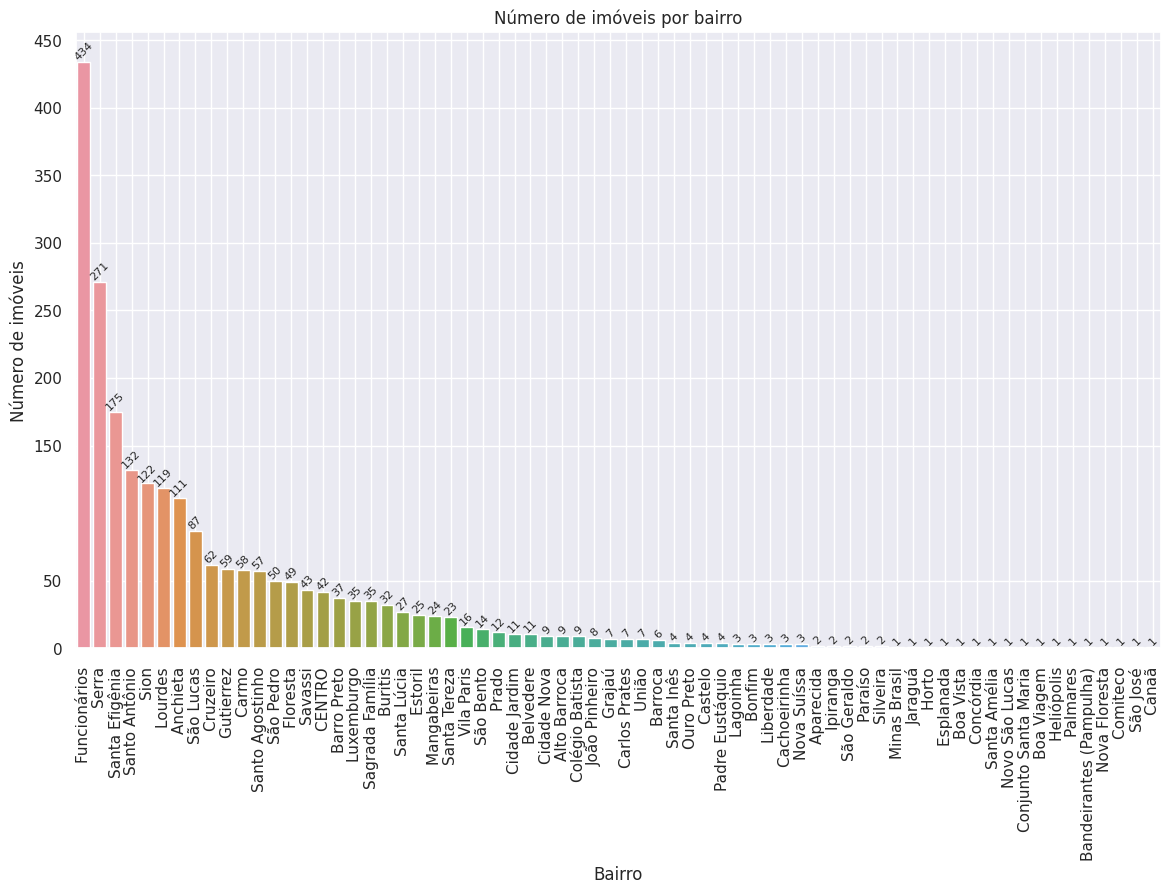

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

filtered_counts = df['Bairro'].value_counts().loc[lambda x: x > 0]

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=filtered_counts.index, y=filtered_counts)
plt.title('Número de imóveis por bairro')
plt.xlabel('Bairro')
plt.ylabel('Número de imóveis')

plt.xticks(rotation=90)

plt.ylim(bottom=1)

ax.yaxis.set_major_formatter(ScalarFormatter())

plt.yticks(ticks=[0, 50, 150, 200, 250, 300, 350, 400, 450])

plt.grid(True)

for x, y in zip(range(len(filtered_counts)), filtered_counts):
    plt.text(x, y, str(y), ha='center', va='bottom', rotation=45, fontsize=8)

plt.show()

**10 BAIRROS COM MAIOR IPTU MÉDIO**

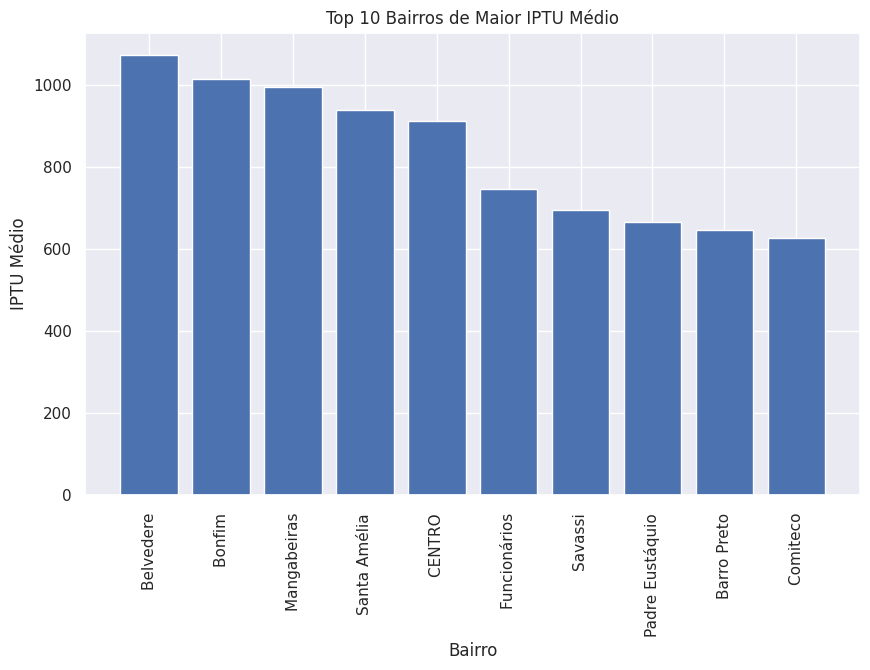

In [169]:
# Calcula o IPTU médio por bairro
df_iptu_medio_por_bairro = df.groupby('Bairro')['IPTU'].mean()

# Seleciona os 10 bairros de maior IPTU médio e ordena em ordem decrescente
top_10_maior_iptu_medio = df_iptu_medio_por_bairro.nlargest(10).sort_values(ascending=False)

# Cria o gráfico dos 10 bairros de maior IPTU médio
plt.figure(figsize=(10, 6))
plt.bar(top_10_maior_iptu_medio.index, top_10_maior_iptu_medio.values)
plt.xlabel('Bairro')
plt.ylabel('IPTU Médio')
plt.title('Top 10 Bairros de Maior IPTU Médio')
plt.xticks(rotation=90)
plt.show()

**10 BAIRROS COM MENOR IPTU MÉDIO**

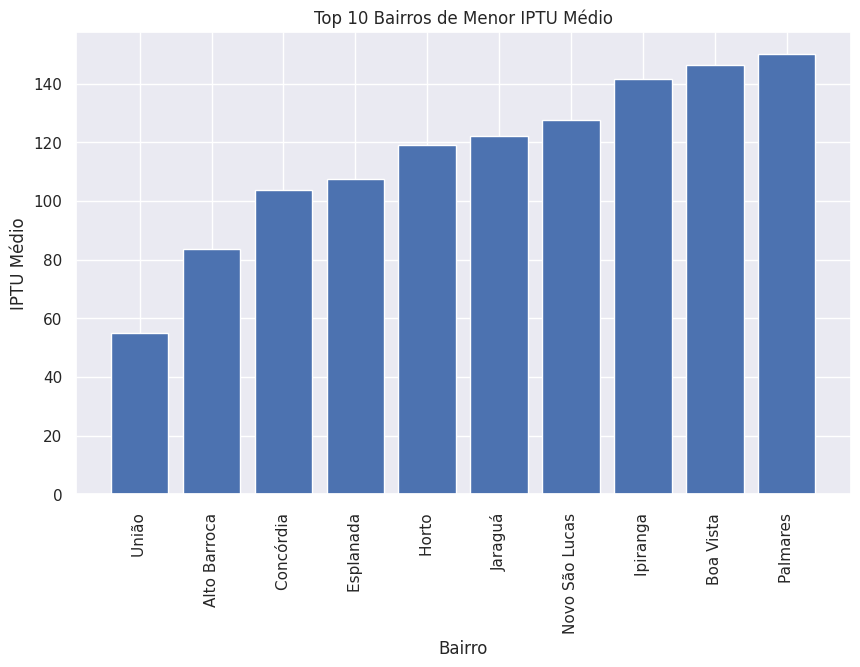

In [170]:
# Seleciona os 10 bairros de menor IPTU médio e ordena em ordem crescente
top_10_menor_iptu_medio = df_iptu_medio_por_bairro.nsmallest(10).sort_values(ascending=True)

# Cria o gráfico dos 10 bairros de menor IPTU médio
plt.figure(figsize=(10, 6))
plt.bar(top_10_menor_iptu_medio.index, top_10_menor_iptu_medio.values)
plt.xlabel('Bairro')
plt.ylabel('IPTU Médio')
plt.title('Top 10 Bairros de Menor IPTU Médio')
plt.xticks(rotation=90)
plt.show()

**10 BAIRROS COM MAIOR IPTU/M²**

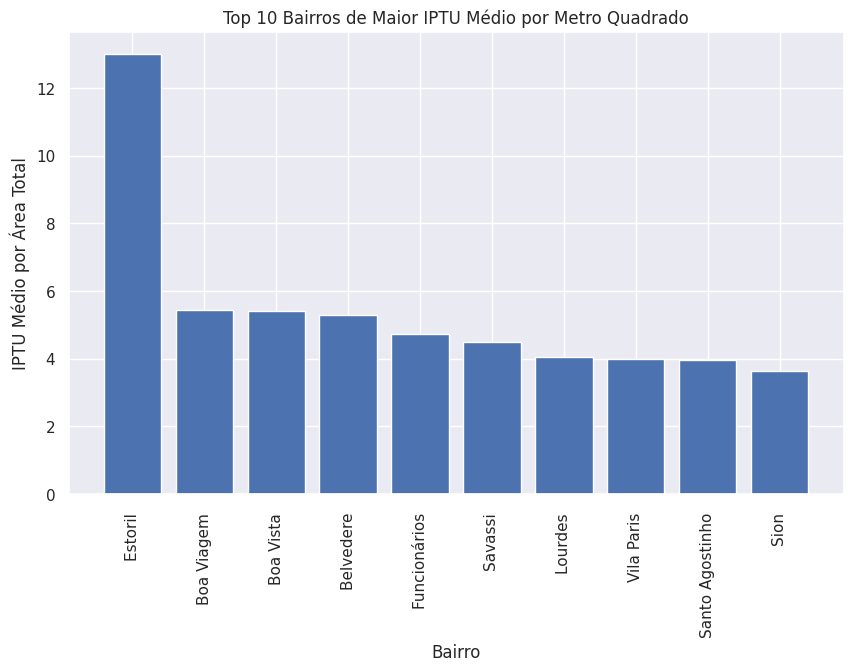

In [171]:
# Soma a área interna com a área externa para obter a área total do imóvel
df['Área total'] = df['Área interna'] + df['Área externa']

# Filtra os imóveis com área total maior que zero
df_area_total_maior_zero = df[df['Área total'] > 0]

# Calcula o IPTU médio por área total do imóvel e por bairro
df_iptu_medio_por_area_total_por_bairro = (df_area_total_maior_zero['IPTU'] / df_area_total_maior_zero['Área total']).groupby(df_area_total_maior_zero['Bairro']).mean()

# Seleciona os 10 bairros de maior IPTU médio por área total e ordena em ordem decrescente
top_10_maior_iptu_medio_por_area_total = df_iptu_medio_por_area_total_por_bairro.nlargest(10).sort_values(ascending=False)

# Cria o gráfico dos 10 bairros de maior IPTU médio por área total
plt.figure(figsize=(10, 6))
plt.bar(top_10_maior_iptu_medio_por_area_total.index, top_10_maior_iptu_medio_por_area_total.values)
plt.xlabel('Bairro')
plt.ylabel('IPTU Médio por Área Total')
plt.title('Top 10 Bairros de Maior IPTU Médio por Metro Quadrado')
plt.xticks(rotation=90)
plt.show()

**10 BAIRROS COM MENOR IPTU/M²**

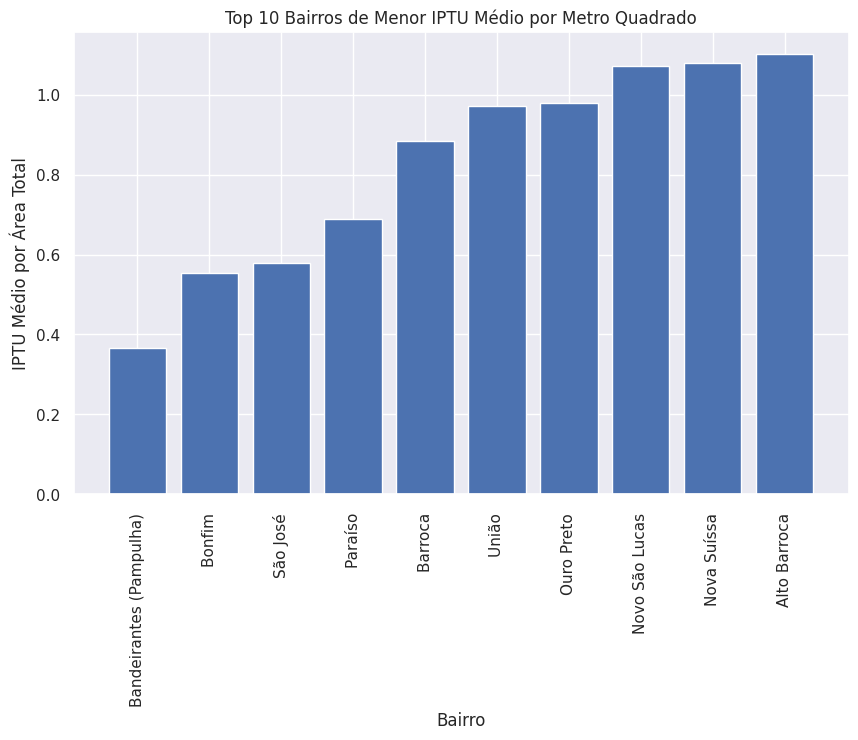

In [172]:
# Seleciona os 10 bairros de menor IPTU médio por área total e ordena em ordem crescente
top_10_menor_iptu_medio_por_area_total = df_iptu_medio_por_area_total_por_bairro.nsmallest(10).sort_values(ascending=True)

# Cria o gráfico dos 10 bairros de menor IPTU médio por área total
plt.figure(figsize=(10, 6))
plt.bar(top_10_menor_iptu_medio_por_area_total.index, top_10_menor_iptu_medio_por_area_total.values)
plt.xlabel('Bairro')
plt.ylabel('IPTU Médio por Área Total')
plt.title('Top 10 Bairros de Menor IPTU Médio por Metro Quadrado')
plt.xticks(rotation=90)
plt.show()

**Top 10 Bairros de Maior Condomínio Médio por Metro Quadrado**

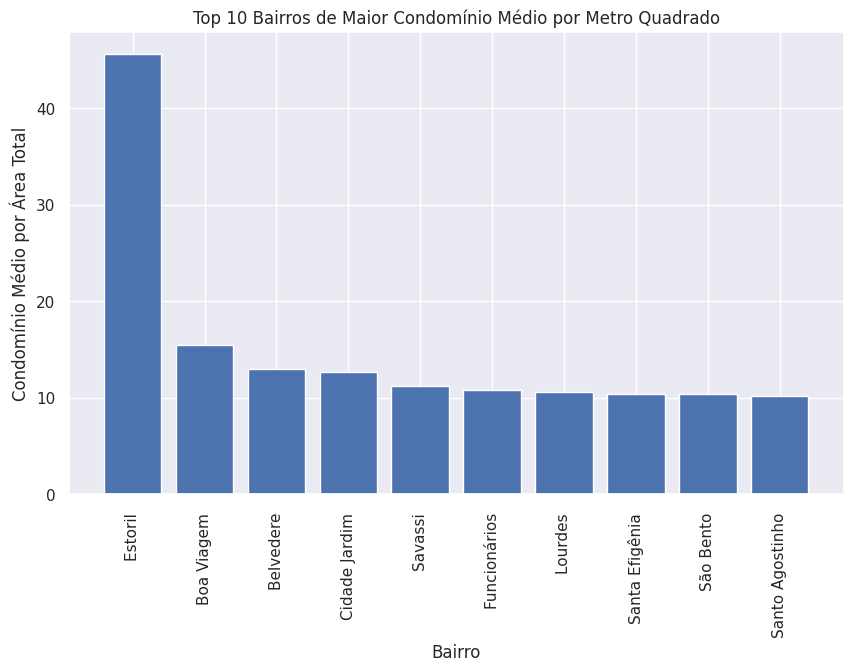

In [173]:
# Soma a área interna com a área externa para obter a área total do imóvel
df['Área total'] = df['Área interna'] + df['Área externa']

# Filtra os imóveis com área total maior que zero
df_area_total_maior_zero = df[df['Área total'] > 0]

# Calcula o Condomínio médio por área total do imóvel e por bairro
df_condominio_medio_por_area_total_por_bairro = (df_area_total_maior_zero['Condomínio'] / df_area_total_maior_zero['Área total']).groupby(df_area_total_maior_zero['Bairro']).mean()

# Seleciona os 10 bairros de maior Condomínio médio por área total e ordena em ordem decrescente
top_10_maior_condominio_medio_por_area_total = df_condominio_medio_por_area_total_por_bairro.nlargest(10).sort_values(ascending=False)

# Cria o gráfico dos 10 bairros de maior Condomínio médio por área total
plt.figure(figsize=(10, 6))
plt.bar(top_10_maior_condominio_medio_por_area_total.index, top_10_maior_condominio_medio_por_area_total.values)
plt.xlabel('Bairro')
plt.ylabel('Condomínio Médio por Área Total')
plt.title('Top 10 Bairros de Maior Condomínio Médio por Metro Quadrado')
plt.xticks(rotation=90)
plt.show()

**Top 10 Bairros de Menor Condomínio Médio por Metro Quadrado**

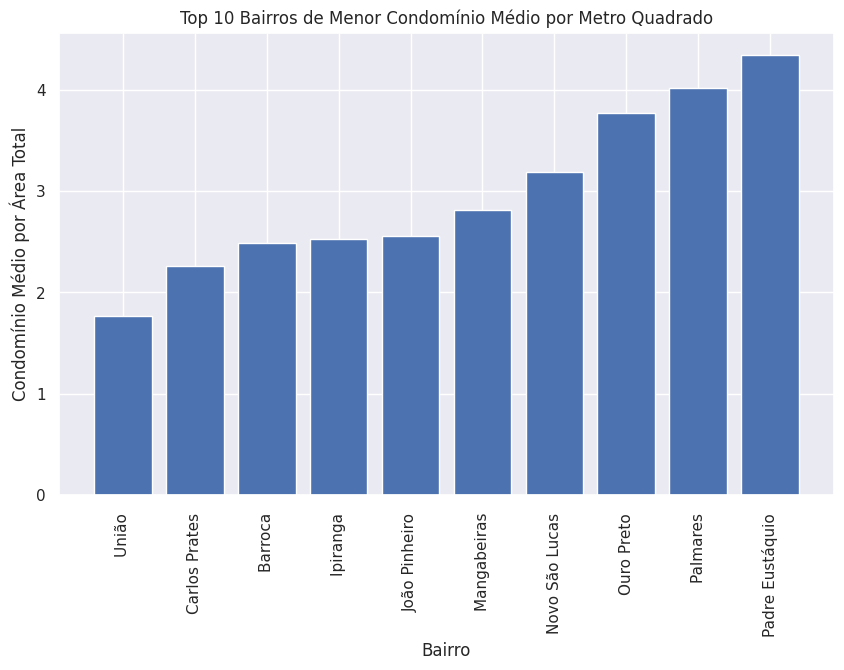

In [174]:
# Seleciona os 10 bairros de menor Condomínio médio por área total e ordena em ordem crescente
top_10_menor_condominio_medio_por_area_total = df_condominio_medio_por_area_total_por_bairro.nsmallest(10).sort_values(ascending=True)

# Cria o gráfico dos 10 bairros de menor Condomínio médio por área total
plt.figure(figsize=(10, 6))
plt.bar(top_10_menor_condominio_medio_por_area_total.index, top_10_menor_condominio_medio_por_area_total.values)
plt.xlabel('Bairro')
plt.ylabel('Condomínio Médio por Área Total')
plt.title('Top 10 Bairros de Menor Condomínio Médio por Metro Quadrado')
plt.xticks(rotation=90)
plt.show()

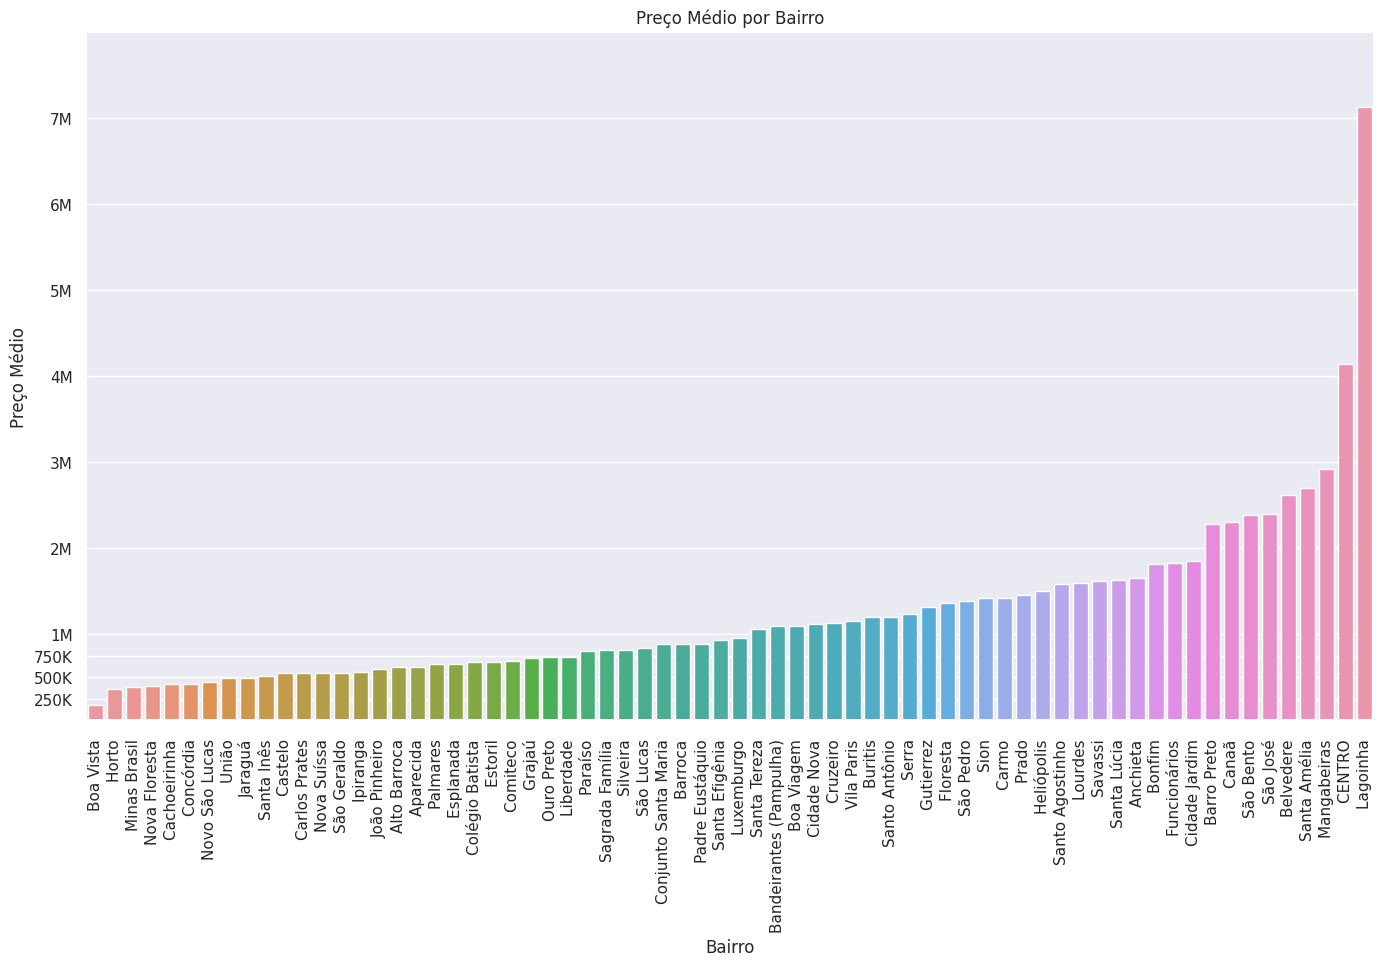

In [175]:
preco_medio_por_bairro = df.groupby('Bairro')['Preço'].mean().reset_index()

preco_medio_por_bairro = preco_medio_por_bairro.sort_values(by='Preço', ascending=True)

plt.figure(figsize=(14, 8))
sns.barplot(x='Bairro', y='Preço', data=preco_medio_por_bairro, orient='v')

plt.xlabel('Bairro')
plt.ylabel('Preço Médio')
plt.title('Preço Médio por Bairro')
plt.tight_layout()

# Nomes X axis verticais
plt.xticks(rotation='vertical')

#Formatar Y
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M' if x >= 1e6 else f'{x/1e3:.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)
plt.yticks(ticks=plt.yticks()[0], labels=[formatter(tick) for tick in plt.yticks()[0]])

# Definir ticks Y
plt.yticks([250000, 500000, 750000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000],
           ['250K', '500K', '750K', '1M', '2M', '3M', '4M', '5M', '6M', '7M'])

# Grid
plt.grid(True, axis='y')

plt.show()

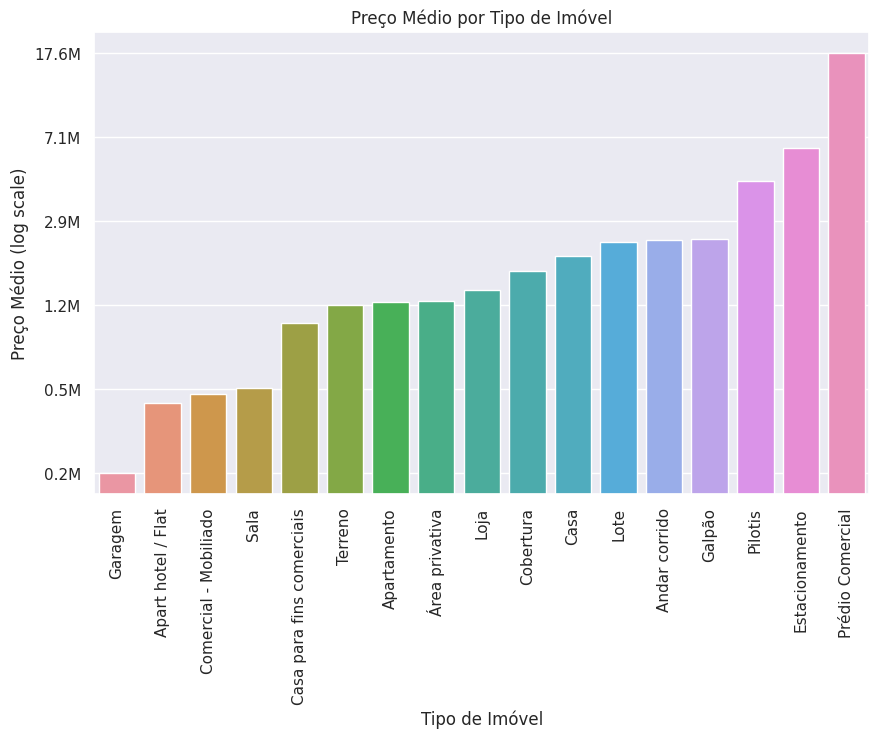

In [176]:
mean_price = df.groupby('Tipo Imóvel')['Preço'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_price.index, y=mean_price.values)

plt.xlabel('Tipo de Imóvel')
plt.ylabel('Preço Médio (log scale)')
plt.title('Preço Médio por Tipo de Imóvel')

# Nomes X axis verticais
plt.xticks(rotation='vertical')

# Formatar y pra millions
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M' if x >= 1e6 else f'{x/1e3:.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)
plt.yticks(ticks=plt.yticks()[0], labels=[formatter(tick) for tick in plt.yticks()[0]])

# Grid
plt.grid(True, axis='y')

# log scale
plt.yscale('log')
y_ticks = np.logspace(np.log10(mean_price.min()), np.log10(mean_price.max()), num=6, base=10)
plt.yticks(y_ticks, [f'{tick/1e6:.1f}M' for tick in y_ticks])


# Display the plot
plt.show()

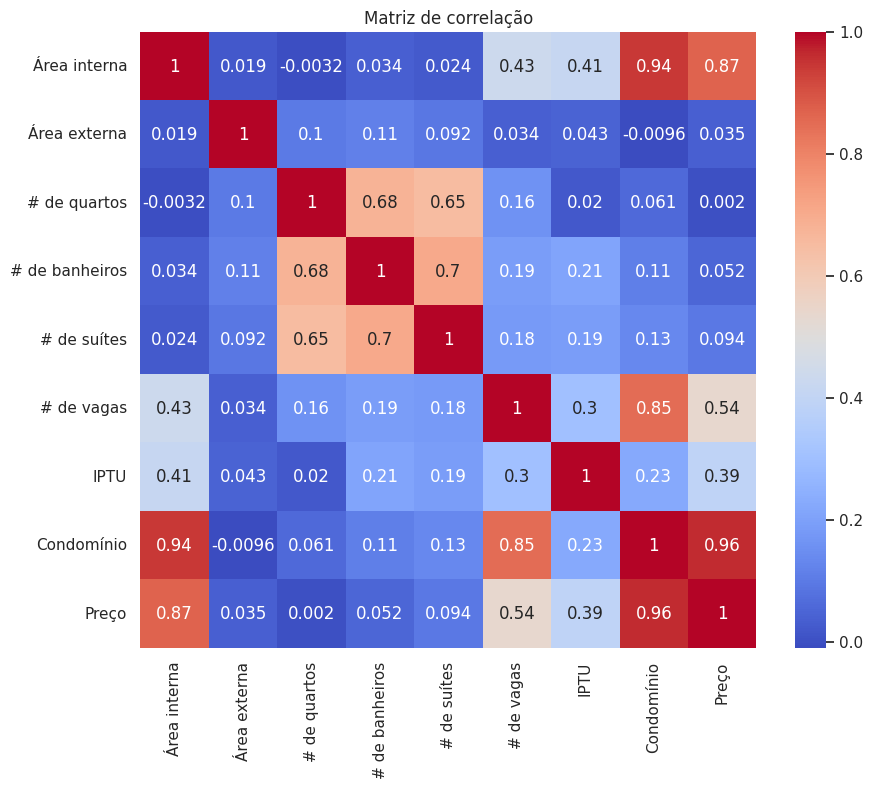

In [177]:
price_variables = ['Área interna', 'Área externa', '# de quartos', '# de banheiros', '# de suítes', '# de vagas', 'IPTU', 'Condomínio', 'Preço']
price_data = df[price_variables]

correlation_matrix = price_data.corr()

# Heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de correlação')

plt.show()

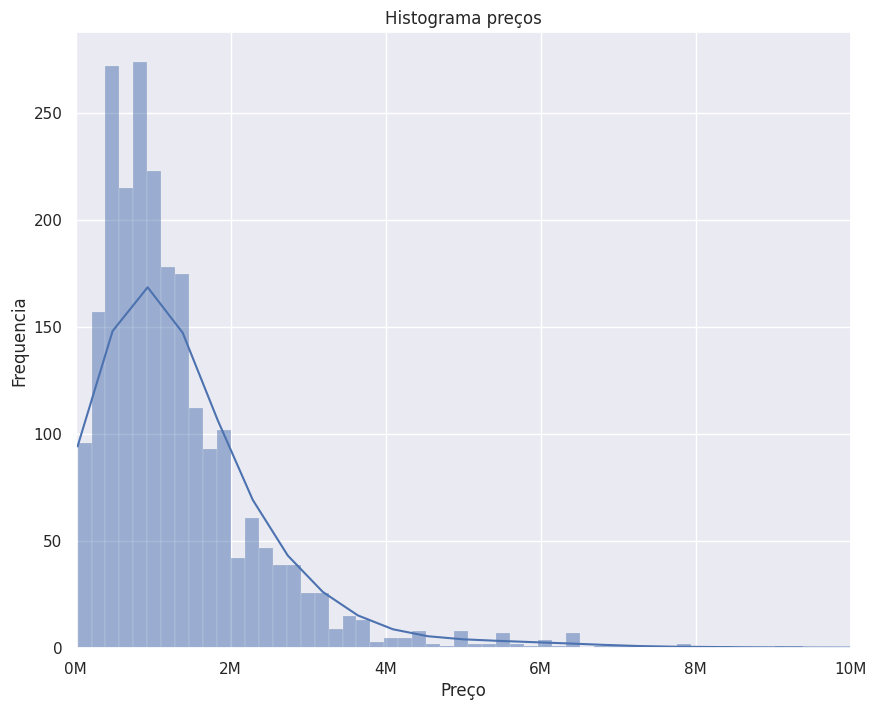

In [178]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="Preço", kde=True, bins=500)

plt.title("Histograma preços")
plt.ylabel('Frequencia')

plt.xlim(0, 10000000)

formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}M')
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

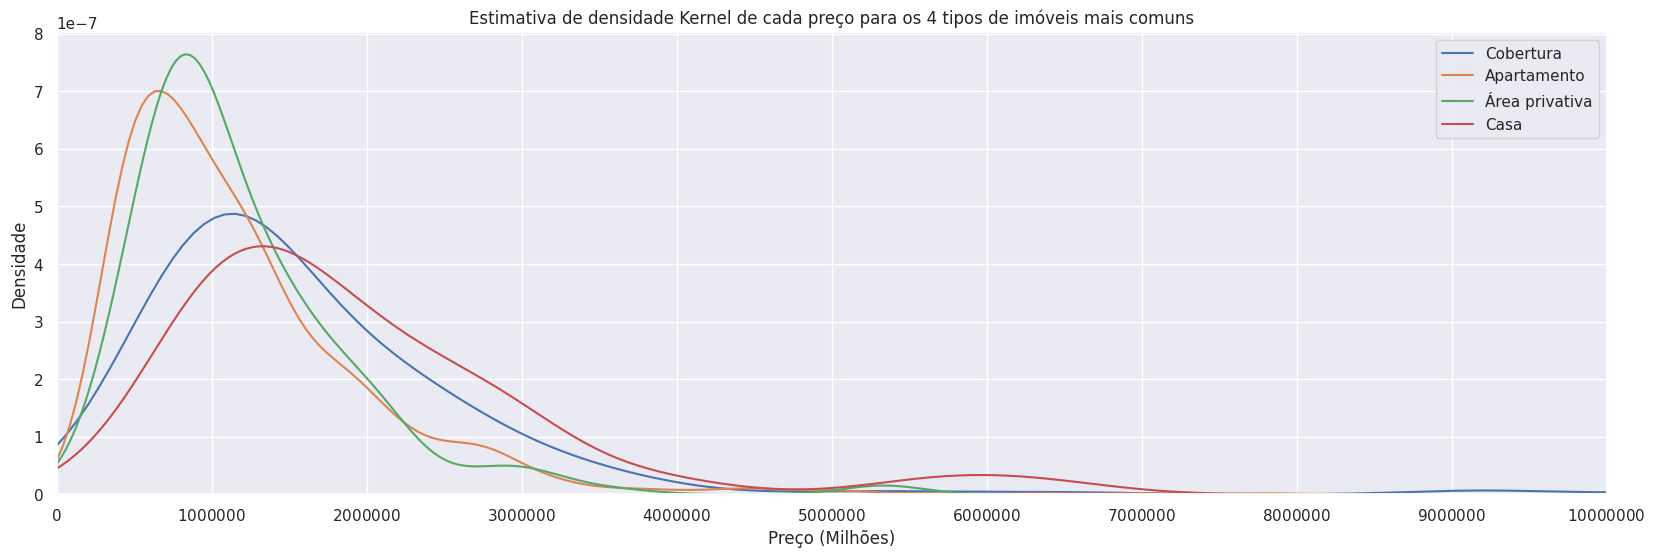

In [179]:
housing_types = ['Cobertura', 'Apartamento', 'Área privativa', 'Casa']
filtered_data = df[df['Tipo Imóvel'].isin(housing_types)]

plt.figure(figsize=(20, 6))

for housing_type in housing_types:
    data = filtered_data[filtered_data['Tipo Imóvel'] == housing_type]['Preço']
    sns.kdeplot(data, label=housing_type, clip=(0, None))

plt.xlabel('Preço (Milhões)')
plt.ylabel('Densidade')
plt.title('Estimativa de densidade Kernel de cada preço para os 4 tipos de imóveis mais comuns')

formatter = ScalarFormatter(useOffset=False, useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((-3, 4))
plt.gca().xaxis.set_major_formatter(formatter)


major_locator = MultipleLocator(1000000)
plt.gca().xaxis.set_major_locator(major_locator)

plt.xlim(0, 10000000)

plt.legend()
plt.show()

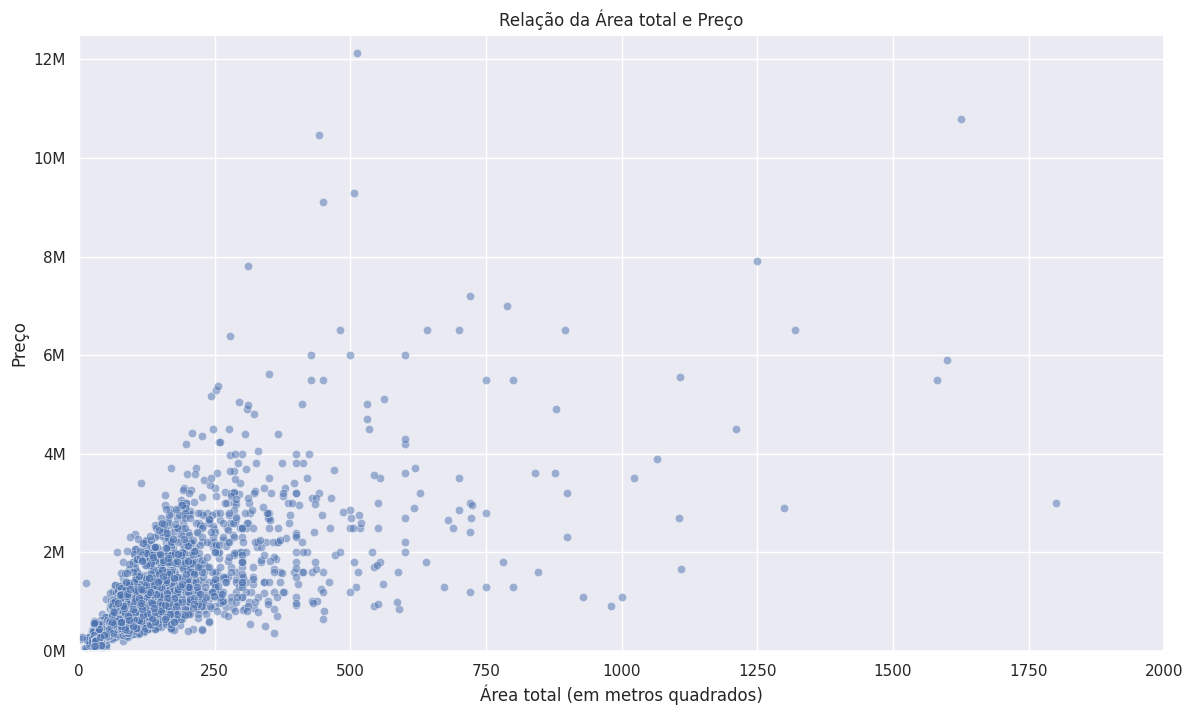

In [180]:
df['Área total'] = df['Área interna'] + df['Área externa']

# Filtra os imóveis com área total maior que zero
df_area_total_maior_zero = df[df['Área total'] > 0]

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_area_total_maior_zero, x='Área total', y='Preço', alpha=0.5)

plt.title("Relação da Área total e Preço")
plt.xlabel("Área total (em metros quadrados)")
plt.ylabel("Preço")

plt.xlim(0, 2000)
plt.ylim(0,12500000)

formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# Área total

**Boxplot das áreas totais do imóveis**

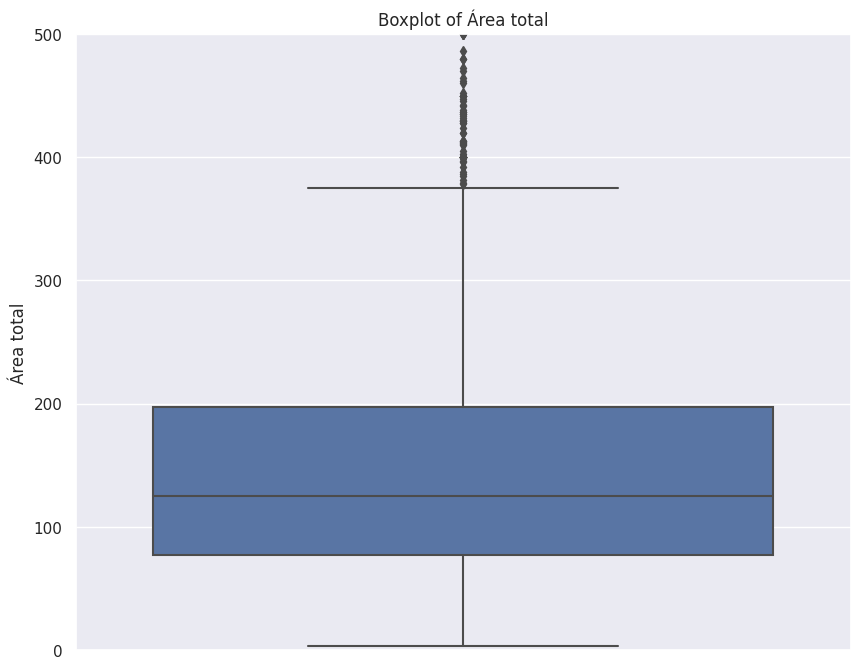

In [181]:
df_area_total_maior_zero = df[df['Área total'] > 0]

plt.figure(figsize=(10, 8))
sns.boxplot(data=df_area_total_maior_zero, y='Área total')

plt.title("Boxplot da Área total")
plt.ylabel("Área total")

plt.ylim(0,500)

plt.show()

# Área interna:

In [182]:
maior_area_interna = df['Área interna'].max()
print(f'A maior área interna é: {maior_area_interna}')

A maior área interna é: 17125.0


**Histograma dos valores de área interna dos dados**

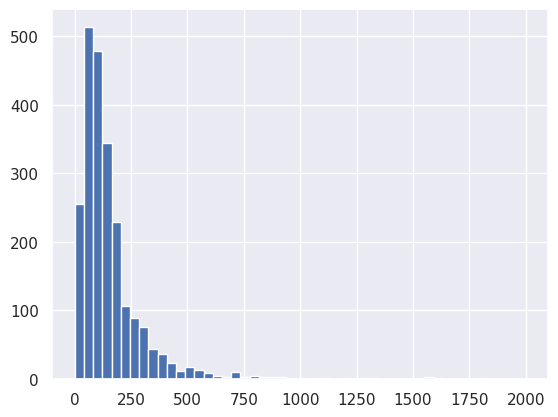

In [183]:
#histograma dos valores de área interna dos dados
bin_edges = np.linspace(0, 2000, 50)
plt.hist(df['Área interna'], bins=bin_edges)
plt.show()

**Maiores e menores áreas internas médias por bairro**

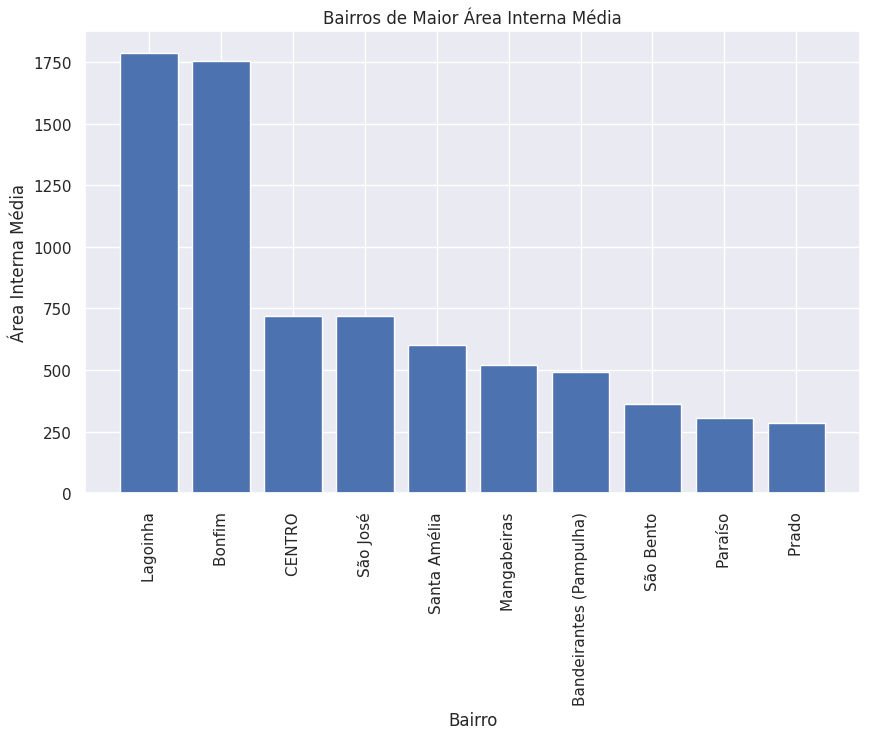

In [184]:
# Calcula a área interna média por bairro, excluindo os imóveis que não possuem área interna 
df_area_interna_media_por_bairro = df.loc[df['Área interna'] != 0].groupby('Bairro')['Área interna'].mean()

# Seleciona os 10 bairros de maior área interna média e ordena em ordem decrescente
top_10_maior_area_interna_media = df_area_interna_media_por_bairro.nlargest(10).sort_values(ascending=False)

# Cria o gráfico dos 10 bairros de maior área interna média
plt.figure(figsize=(10, 6))
plt.bar(top_10_maior_area_interna_media.index,top_10_maior_area_interna_media.values)
plt.xlabel('Bairro')
plt.ylabel('Área Interna Média')
plt.title('Bairros de Maior Área Interna Média')
plt.xticks(rotation=90)
plt.show()

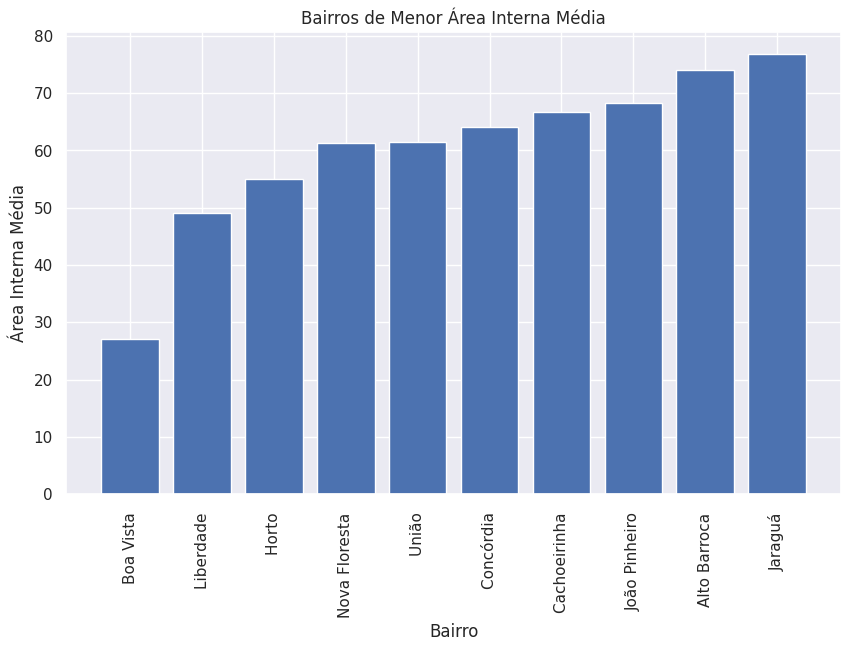

In [185]:
# Seleciona os 10 bairros de menor área interna média e ordena em ordem crescente
top_10_menor_area_interna_media = df_area_interna_media_por_bairro.nsmallest(10).sort_values(ascending=True)

# Cria o gráfico dos 10 bairros de menor área interna média
plt.figure(figsize=(10, 6))
plt.bar(top_10_menor_area_interna_media.index, top_10_menor_area_interna_media.values)
plt.xlabel('Bairro')
plt.ylabel('Área Interna Média')
plt.title('Bairros de Menor Área Interna Média')
plt.xticks(rotation=90)
plt.show()

# Área externa:

In [186]:
maior_area_externa = df['Área externa'].max()
print(f'A maior área externa é: {maior_area_externa}')

A maior área externa é: 1042.0


**Bairros com mais imóveis com área externa**

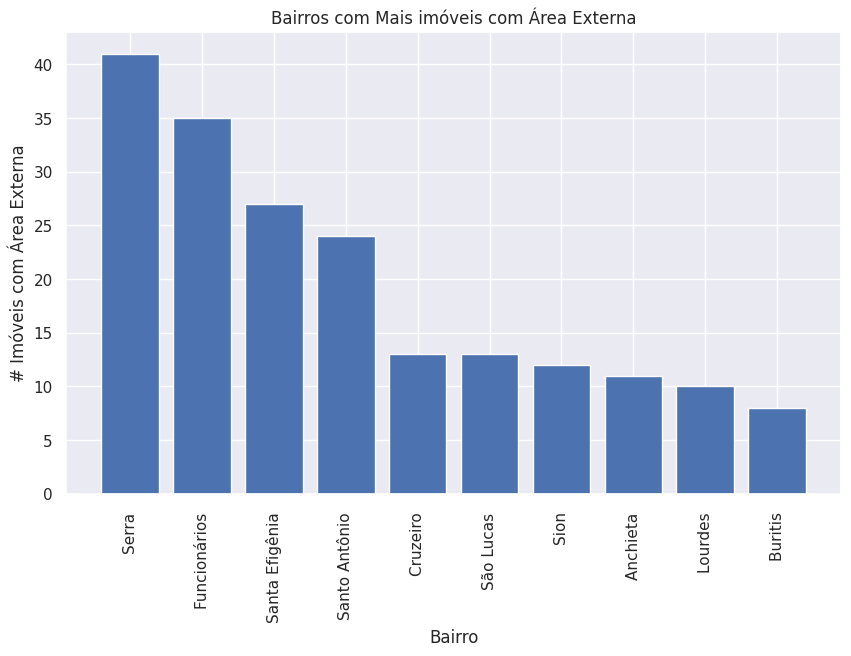

In [187]:
condition = (df['Área externa'] != 0)
df_area_externa = df[condition].groupby('Bairro')['Área externa'].count()
# Seleciona os 10 bairros de mais imóveis com área externa e ordena em ordem decrescente
bairros_com_mais_imóveis_com_area_externa = df_area_externa.nlargest(10).sort_values(ascending=False)

# Cria o gráfico dos 10 bairros com mais imóveis com área externa
plt.figure(figsize=(10, 6))
plt.bar(bairros_com_mais_imóveis_com_area_externa.index,bairros_com_mais_imóveis_com_area_externa.values)
plt.xlabel('Bairro')
plt.ylabel('# Imóveis com Área Externa')
plt.title('Bairros com Mais imóveis com Área Externa')
plt.xticks(rotation=90)
plt.show()

**Histograma dos valores de área interna dos dados**

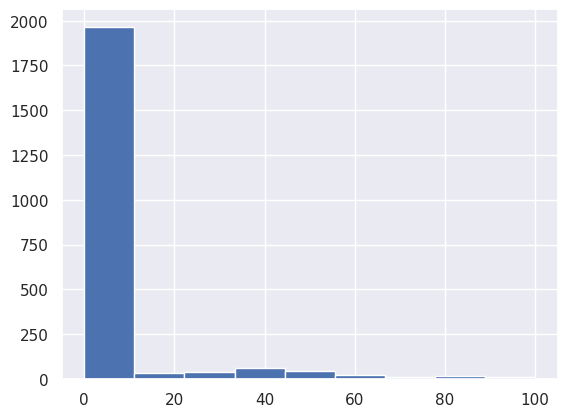

In [188]:
bin_edges = np.linspace(0, 100, 10)
plt.hist(df.loc[df['Área interna'] != 0]['Área externa'], bins=bin_edges)
plt.show()

**Maiores e menores áreas externas médias por bairro**

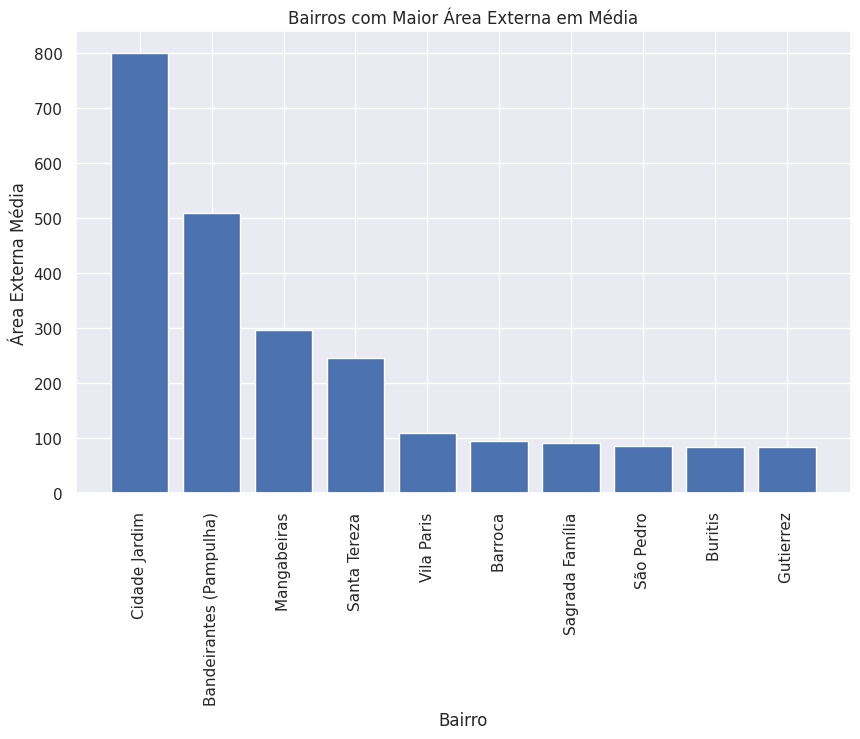

In [189]:
# Calcula a área externa média por bairro, excluindo os imóveis que não possuem área externa 
df_area_externa_media_por_bairro = df.loc[df['Área externa'] != 0].groupby('Bairro')['Área externa'].mean()

# Seleciona os 10 bairros de maior área interna média e ordena em ordem decrescente
top_10_maior_area_externa_media = df_area_externa_media_por_bairro.nlargest(10).sort_values(ascending=False)

# Cria o gráfico dos 10 bairros de maior área interna média
plt.figure(figsize=(10, 6))
plt.bar(top_10_maior_area_externa_media.index,top_10_maior_area_externa_media.values)
plt.xlabel('Bairro')
plt.ylabel('Área Externa Média')
plt.title('Bairros com Maior Área Externa em Média')
plt.xticks(rotation=90)
plt.show()

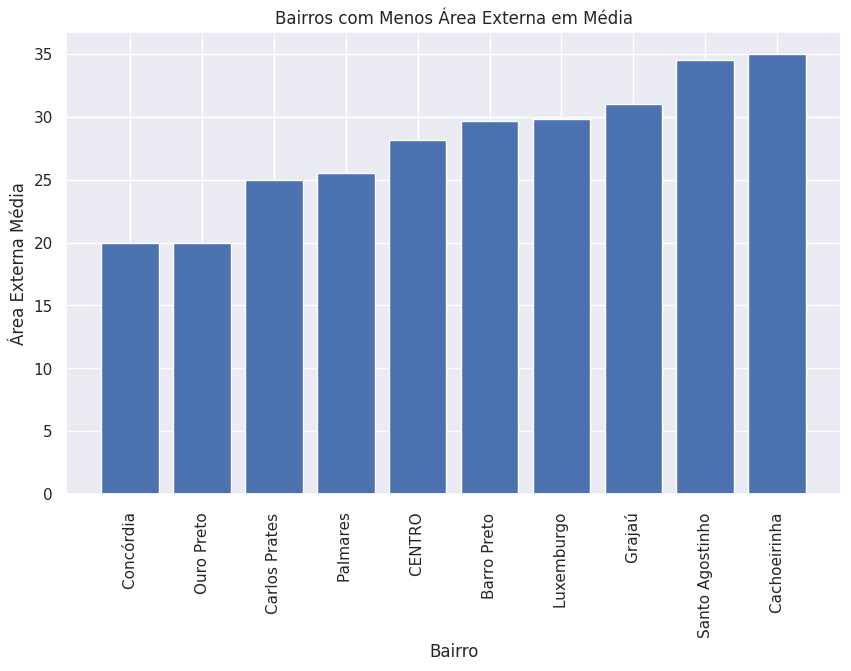

In [190]:
# Seleciona os 10 bairros de menor área externa média e ordena em ordem crescente
top_10_menor_area_externa_media = df_area_externa_media_por_bairro.nsmallest(10).sort_values(ascending=True)

# Cria o gráfico dos 10 bairros de maior área interna média
plt.figure(figsize=(10, 6))
plt.bar(top_10_menor_area_externa_media.index,top_10_menor_area_externa_media.values)
plt.xlabel('Bairro')
plt.ylabel('Área Externa Média')
plt.title('Bairros com Menos Área Externa em Média')
plt.xticks(rotation=90)
plt.show()

**Relação entre a área total e o IPTU**

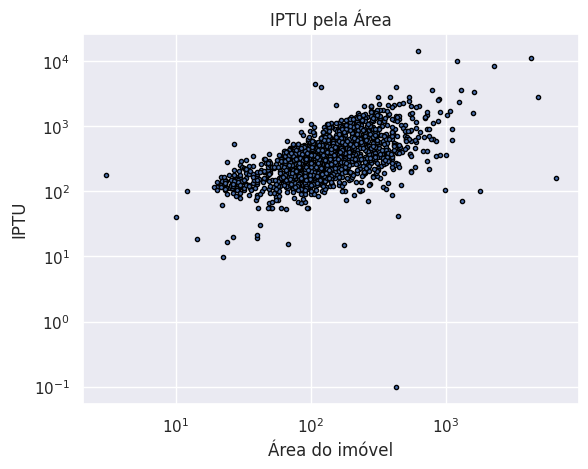

In [191]:
#relação entre área total e IPTU
plt.scatter(df['Área total'], df['IPTU'], edgecolors="black", marker=".")
# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Área do imóvel')
plt.ylabel('IPTU')
plt.title('IPTU pela Área')

# Display the plot
plt.show()